In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set Up

In [2]:
# LOAD RESULTS
res_p = '/Users/harveyaa/Documents/masters/neuropsych_mtl/ML/benchmark_1/results/'
out_p = '/Users/harveyaa/Documents/masters/neuropsych_mtl/ML/benchmark_1/results/'

strat_p = os.path.join(res_p,'stratify.csv')
res_strat = pd.read_csv(strat_p,index_col=0,header=[0,1])

loo_p = os.path.join(res_p,'LOO.csv')
res_loo = pd.read_csv(loo_p,index_col=0,header=[0,1])

In [3]:
# DEFINTE CLASSIFIERS

clfs = res_strat.index.to_list()

In [4]:
# DEFINE / ORDER / FORMAT LABELS

cases_effect_order = ['SZ',
                      'BIP',
                      'ASD',
                      'ADHD',
                     'DEL22q11_2',
                     #'NRXN1del',
                     'DEL16p11_2',
                     'DUP16p11_2',
                     'DUP22q11_2',
                     #'DUP17p12',
                     'DEL1q21_1',
                     'DUP1q21_1',
                     #'DEL16p13_11',
                     
                     'DEL17p12',
                     
                     'DEL13q12_12',
                     'DUP13q12_12',
                     'TAR_dup',
                     'DUP16p13_11',
                     'DEL15q11_2',
                     'DUP2q13',
                     'DUP15q11_2',
                     'DEL2q13',
                     'DUP15q13_3_CHRNA7']
cases_labels =       ['SZ                   n=283',
                      'BIP                  n=44',
                      'ASD                 n=225',
                      'ADHD              n=328',
                     'DEL 22q11.2     n=43',
                     #'DEL NRXN1        n=6',
                     'DEL 16p11.2      n=35',
                     'DUP 16p11.2     n=35',
                     'DUP 22q11.2     n=20',
                     #'DUP 17p12        n=10',
                     'DEL 1q21.1       n=25',
                     'DUP 1q21.1       n=20',
                     #'DEL 16p13.11    n=10',
        
                    
                     'DEL 17p12        n=16',
                     
                     'DEL 13q12.12   n=22',
                     'DUP 13q12.12   n=20',
                     'DUP TAR           n=29',
                     'DUP 16p13.11  n=40',
                     'DEL 15q11.2    n=103',
                     'DUP 2q13         n=88',
                     'DUP 15q11.2   n=136',
                     'DEL 2q13         n=183',
                     'DUP 15q13.3   n=190']
cases_labels_180 =       ['n=283                   SZ',
                      'n=44                   BIP',
                      'n=225                 ASD',
                      'n=328              ADHD',
                     'n=43     DEL 22q11.2',
                     #'DEL NRXN1        n=6',
                     'n=35      DEL 16p11.2',
                     'n=35     DUP 16p11.2',
                     'n=20     DUP 22q11.2',
                     #'DUP 17p12        n=10',
                     'n=25       DEL 1q21.1',
                     'n=20       DUP 1q21.1',
                     #'DEL 16p13.11    n=10',
        
                    
                     'n=16        DEL 17p12',
                     
                     'n=22   DEL 13q12.12',
                     'n=20   DUP 13q12.12',
                     'n=29           DUP TAR',
                     'n=40   DUP 16p13.11',
                     'n=103    DEL 15q11.2',
                     'n=88          DUP 2q13',
                     'n=136   DUP 15q11.2',
                     'n=183         DEL 2q13',
                     'n=190   DUP 15q13.3']
cases_labels_180.reverse()
cases_effect_order.reverse()
cases_labels.reverse()

cases_effect_order_loo = ['SZ',
                      'BIP',
                      'ASD',
                      'ADHD',
                     #'DEL22q11_2',
                     #'NRXN1del',
                     'DEL16p11_2',
                     'DUP16p11_2',
                     'DUP22q11_2',
                     #'DUP17p12',
                     'DEL1q21_1',
                     'DUP1q21_1',
                     #'DEL16p13_11',
                     
                     'DEL17p12',
                     
                     'DEL13q12_12',
                     'DUP13q12_12',
                     'TAR_dup',
                     'DUP16p13_11',
                     'DEL15q11_2',
                     'DUP2q13',
                     'DUP15q11_2',
                     'DEL2q13',
                     'DUP15q13_3_CHRNA7']
cases_labels_loo =    ['SZ                   n=283',
                      'BIP                  n=44',
                      'ASD                 n=225',
                      'ADHD              n=328',
                     #'DEL 22q11.2     n=43',
                     #'DEL NRXN1        n=6',
                     'DEL 16p11.2      n=35',
                     'DUP 16p11.2     n=35',
                     'DUP 22q11.2     n=20',
                     #'DUP 17p12        n=10',
                     'DEL 1q21.1       n=25',
                     'DUP 1q21.1       n=20',
                     #'DEL 16p13.11    n=10',
        
                    
                     'DEL 17p12        n=16',
                     
                     'DEL 13q12.12   n=22',
                     'DUP 13q12.12   n=20',
                     'DUP TAR           n=29',
                     'DUP 16p13.11  n=40',
                     'DEL 15q11.2    n=103',
                     'DUP 2q13         n=88',
                     'DUP 15q11.2   n=136',
                     'DEL 2q13         n=183',
                     'DUP 15q13.3   n=190']
cases_labels_loo_180 =       ['n=283                   SZ',
                      'n=44                   BIP',
                      'n=225                 ASD',
                      'n=328              ADHD',
                     'n=43     DEL 22q11.2',
                     #'DEL NRXN1        n=6',
                     'n=35      DEL 16p11.2',
                     'n=35     DUP 16p11.2',
                     #'n=20     DUP 22q11.2',
                     #'DUP 17p12        n=10',
                     'n=25       DEL 1q21.1',
                     'n=20       DUP 1q21.1',
                     #'DEL 16p13.11    n=10',
        
                    
                     'n=16        DEL 17p12',
                     
                     'n=22   DEL 13q12.12',
                     'n=20   DUP 13q12.12',
                     'n=29           DUP TAR',
                     'n=40   DUP 16p13.11',
                     'n=103    DEL 15q11.2',
                     'n=88          DUP 2q13',
                     'n=136   DUP 15q11.2',
                     'n=183         DEL 2q13',
                     'n=190   DUP 15q13.3']
cases_labels_loo_180.reverse()
cases_effect_order_loo.reverse()
cases_labels_loo.reverse()

# Stratified

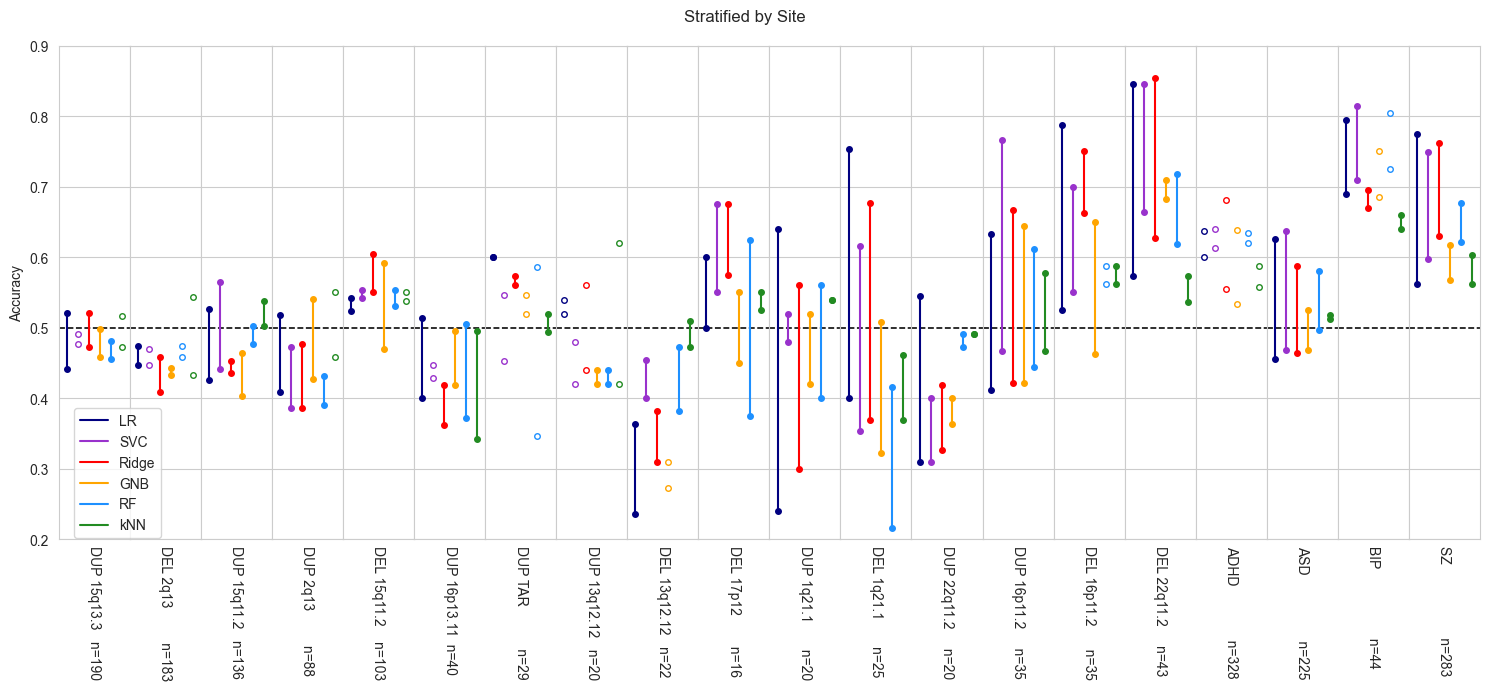

In [8]:
#################
# STRAT BY SITE #
#################
title = 'Stratified by Site'
fig,ax = plt.subplots(1,len(cases_effect_order),figsize=(15,7),sharey=True,sharex=True)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases_effect_order):
    for i,clf in enumerate(clfs):
        conf_acc = res_strat.loc[clf][case].loc['conf']
        conn_acc = res_strat.loc[clf][case].loc['conf_conn']
        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'

        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)
        ax[j].set_xlabel(cases_labels[j],rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

handles, _ = ax[-1].get_legend_handles_labels()
labels = clfs
ax[0].set_ylabel('Accuracy')
fig.legend(handles, labels, loc=(0.05,0.22))
plt.suptitle(title)
plt.ylim(0.2,0.9)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'stratify.png'),dpi=300)

# LOO

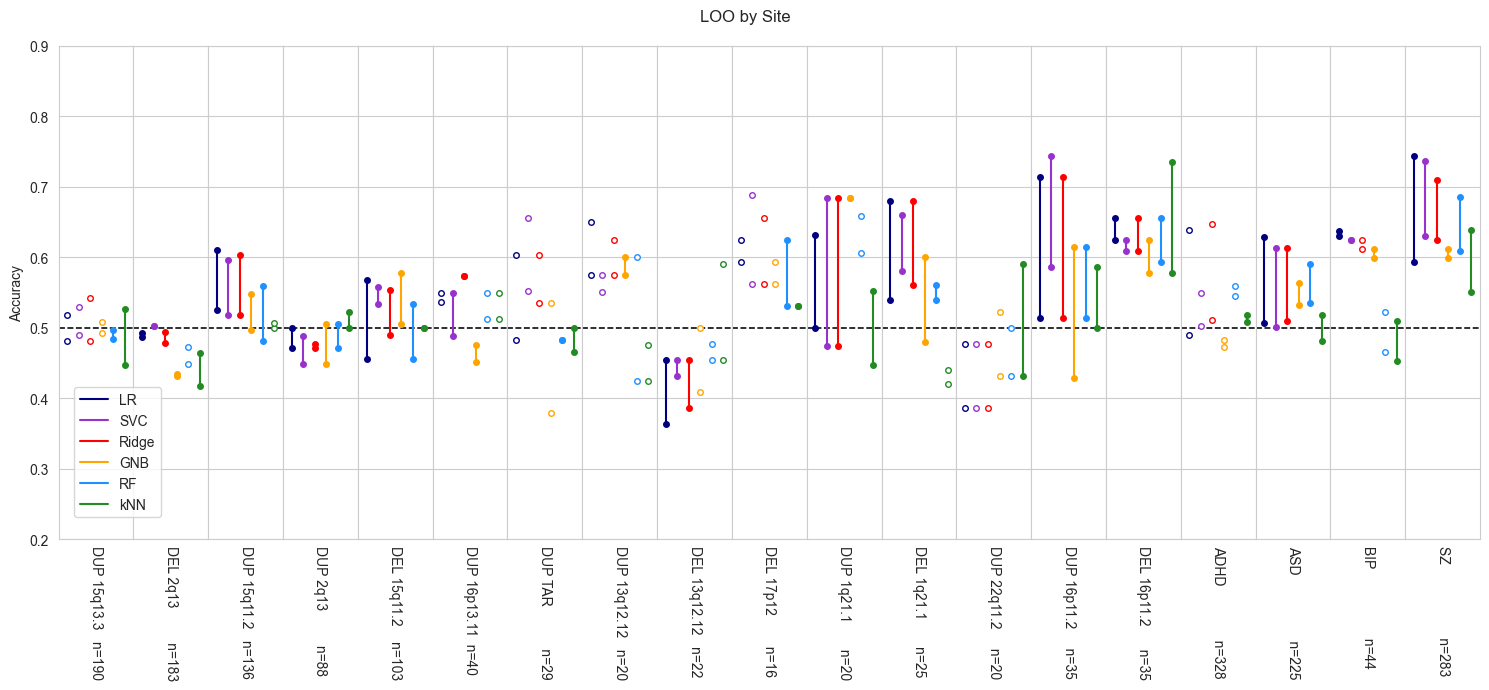

In [9]:
###############
# LOO by Site #
###############
title = 'LOO by Site'
fig,ax = plt.subplots(1,len(cases_effect_order_loo),figsize=(15,7),sharey=True,sharex=True)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
sns.set_style('whitegrid')
colors = ['navy','darkorchid','red','orange','dodgerblue','forestgreen']

for j,case in enumerate(cases_effect_order_loo):
    for i,clf in enumerate(clfs):
        conf_acc = res_loo.loc[clf][case].loc['conf']
        conn_acc = res_loo.loc[clf][case].loc['conf_conn']
        if conf_acc > conn_acc:
            mfc = 'white'
            ls =''
        else:
            mfc = colors[i]
            ls = '-'

        ax[j].plot(i,conn_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot(i,conf_acc,marker='o',color=colors[i],ms=4,markerfacecolor=mfc)
        ax[j].plot((i,i),(conf_acc,conn_acc),color=colors[i],ls=ls,label=clf)
        ax[j].set_xticklabels([])
        ax[j].set_xticks([])
        ax[j].set_xlim(-0.75,5.75)
        ax[j].set_xlabel(cases_labels_loo[j],rotation=270)

        lines = ax[j].get_ygridlines()
        b = lines[5]
        b.set_color('black')
        b.set_linewidth(1.15)
        b.set_linestyle('--')

handles, _ = ax[-1].get_legend_handles_labels()
labels = clfs
ax[0].set_ylabel('Accuracy')
fig.legend(handles, labels, loc=(0.05,0.25))
plt.suptitle(title)
plt.ylim(0.2,0.9)
plt.tight_layout()
plt.subplots_adjust(wspace=0)
plt.savefig(os.path.join(out_p,'LOO.png'),dpi=300)